# Changes-of-mind and eye-hand coordination

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import data_reader
import matplotlib.patches as mpatches
import os
import matplotlib.lines as mlines
###################################
%matplotlib inline
mpl.matplotlib_fname();

## Read choices and dynamics data for experiment 1 and 2

In [3]:
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
choices_1,dynamics_1 = dr.get_data(path='../../data/experimental_data/exp1/', stim_viewing=False)

choices_2,dynamics_2 = dr.get_data(path='../../data/experimental_data/exp2/', stim_viewing=False)

choices_1.reset_index(inplace=True)


## Function to plot neural activities

In [606]:
def plot_figure_1(c, exp):
    save_path = '../../figures_output/'
    save_path_neural = '../../figures_output/'
    fig1b = pd.read_csv('../../figures_output/Fig1_b_exp1.txt', sep=',')
    fig1c = pd.read_csv('../../figures_output/Fig1_c_exp1.txt', sep=',')

    fig1d1 = pd.read_csv('../../figures_output/Fig1_d1_exp1.txt', sep=',')
    fig1d2 = pd.read_csv('../../figures_output/Fig1_d2_exp1.txt', sep=',')
    
    if(exp == 'Exp. 2'):
        fig1b_exp2 = pd.read_csv('../../figures_output/Fig1_b_exp2.txt', sep=',')
        fig1c_exp2 = pd.read_csv('../../figures_output/Fig1_c_exp2.txt', sep=',')

        fig1d1_exp2 = pd.read_csv('../../figures_output/Fig1_d1_exp2.txt', sep=',')
        fig1d2_exp2 = pd.read_csv('../../figures_output/Fig1_d2_exp2.txt', sep=',')

    fig_neural, ax_neural = plt.subplots(4, 1,sharex=True, sharey=False)
    times = np.linspace(0,4000,4000)
    
    plt.tight_layout()
    
    y_1 = fig1b.y_1[::2].copy()
    y_2 = fig1b.y_2[::2].copy()
    y_1_25 = fig1b.y_1_25[::2].copy()
    y_2_25 = fig1b.y_2_25[::2].copy()
    
    ax_neural[0].plot(times[900:1900:1], y_1[900:1900:1], label='Left, 3.2%', color='blue',linestyle='dashed')
    ax_neural[0].plot(times[900:1900:1], y_2[900:1900:1], label='Right, 3.2%', color='orange',linestyle='dashed')
    ax_neural[0].plot(times[900:1900:1], y_1_25[900:1900:1], label='Left, 25.6%', color='blue',linestyle='solid')
    ax_neural[0].plot(times[900:1900:1], y_2_25[900:1900:1], label='Right, 25.6%', color='orange',linestyle='solid')
    ax_neural[0].set_title('Sensorimotor')
    ax_neural[0].legend(bbox_to_anchor=(-0.1, 1), frameon=False)
    
    y_mc_hu = fig1b.y_mc_hu[::2].copy()
    y_mc_hu_25 = fig1b.y_mc_hu_25[::2].copy()
    
    ax_neural[1].plot(times[900:1900:1],y_mc_hu[900:1900:1], label= 'Uncertainty, 3.2%',color='red',linestyle='dashed')
    ax_neural[1].plot(times[900:1900:1],y_mc_hu_25[900:1900:1], label='Uncertainty, 25.6%',color='red',linestyle='solid')
    ax_neural[1].set_title('Uncertainty')
    ax_neural[1].legend(bbox_to_anchor=(-0.1, -1), frameon=False)
    
    y_3 = fig1b.y_1[::2].copy()
    y_4 = fig1b.y_2[::2].copy()
    y_3_25 = fig1b.y_1_25[::2].copy()
    y_4_25 = fig1b.y_2_25[::2].copy()
    
    ax_neural[2].plot(times[900:1900:1], y_3[900:1900:1],color='blue',linestyle='dashed')
    ax_neural[2].plot(times[900:1900:1], y_4[900:1900:1],color='orange',linestyle='dashed')
    ax_neural[2].plot(times[900:1900:1], y_3_25[900:1900:1],color='blue',linestyle='solid')
    ax_neural[2].plot(times[900:1900:1], y_4_25[900:1900:1],color='orange',linestyle='solid')
    ax_neural[2].set_title('Eye')
    
    y_5 = fig1b.y_5[::2].copy()
    y_6 = fig1b.y_6[::2].copy()
    y_5_25 = fig1b.y_5_25[::2].copy()
    y_6_25 = fig1b.y_6_25[::2].copy()
    
    ax_neural[3].plot(times[900:1900:1], y_5[900:1900:1],color='blue',linestyle='dashed')
    ax_neural[3].plot(times[900:1900:1], y_6[900:1900:1],color='orange',linestyle='dashed')
    ax_neural[3].plot(times[900:1900:1], y_5_25[900:1900:1],color='blue',linestyle='solid')
    ax_neural[3].plot(times[900:1900:1], y_6_25[900:1900:1],color='orange',linestyle='solid')
    ax_neural[3].set_title('Hand')
    

    fig_neural.text(0.5, -0.05, 'Time (ms)', ha='center',fontsize=18)
    fig_neural.text(-0.04, 0.6,'Firing rate (Hz)', va='center', rotation='vertical',fontsize=18)
    
    save_path_neural = save_path_neural + 'neural_activity_model' + '_' + exp.lower().replace(" ", "_") + '.png'
    plt.savefig(save_path_neural, bbox_inches='tight')


    figure_x_pattern= plt.figure()
    axes_x_pattern  = figure_x_pattern.gca()

    correct= axes_x_pattern.errorbar(x=[0,1,2,3,4,5], y=fig1c.x_correct, yerr=fig1c.x_correct_sem,color='blue', label='correct',fmt='o')
    error = axes_x_pattern.errorbar(x=[0,1,2,3,4,5], y=fig1c.x_error, yerr=fig1c.x_error_sem,color='red', label='error',fmt='o')
    
    plt.xticks(np.arange(6), ('0', '0.032', '0.064', '0.128', '0.256', '0.512'))
    
    plt.legend(handles=[correct, error], frameon=True)
    plt.xlabel('Coherence')
    plt.ylabel('Uncertainty ' + r'$\upsilon$' + '(%)')
    save_path = save_path + 'x_pattern_uncertainty_model' + '_' + exp.lower().replace(" ", "_") + '.png'
    plt.savefig(save_path, bbox_inches='tight')

## Nothing out of the ordinary here. Neural activities show typical patterns.

### i.e.: Sensorimotor ramps up faster and reaches a higher magnitude for higher motion coherence. Uncertainty is lower for higher motion coherence. Eye initiates before hand due to lower initiatioin threshold.

### The model has been simplified. Sensorimotor populations now receive excitatory feedback from one uncertainty-monitoring population that integrates the summed input. 

### The '<' pattern of uncertainty is present. 

### Neural activities are not going to be shown in the paper.

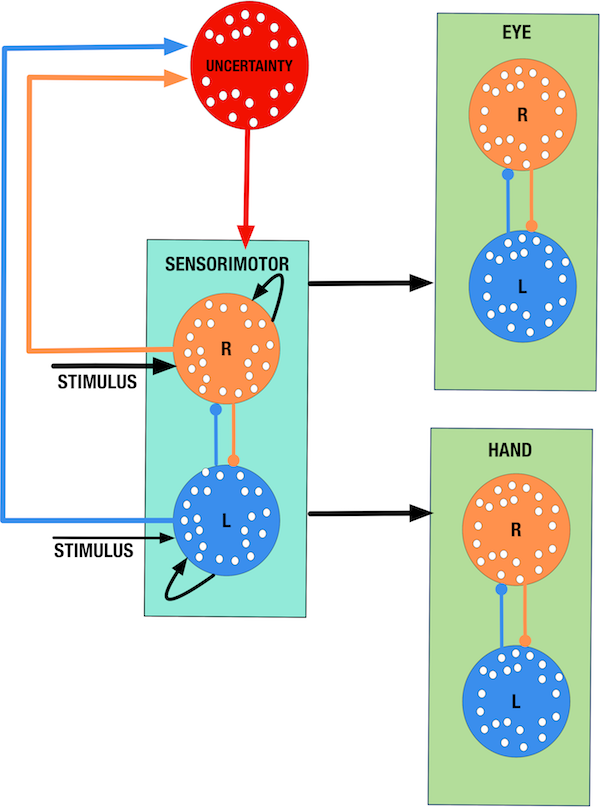

In [607]:
from IPython.display import Image
Image(filename='../../figures_output/eye_hand_model.png')

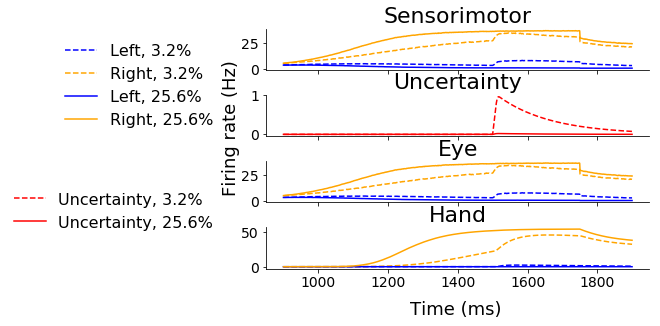

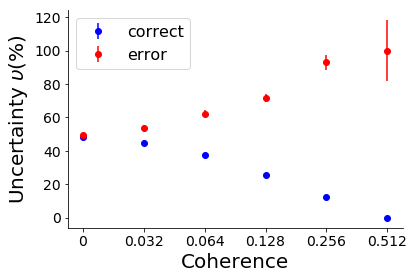

In [608]:
plot_figure_1(choices_1, 'Exp. 1')

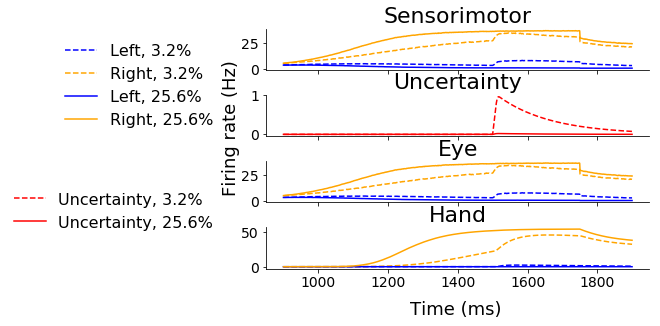

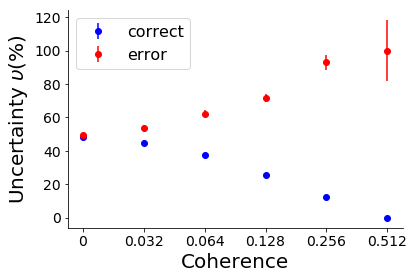

In [609]:
plot_figure_1(choices_2, 'Exp. 2')

## Function to plot psychometric function. 

In [469]:
def get_ci(c, n_threshold=0):
    psf = np.array([len(c[(c.is_correct) & (c.coherence==coherence) & (c.is_com==is_com)]) / 
                   len(c[(c.coherence==coherence) & (c.is_com==is_com)]) 
               if len(c[(c.coherence==coherence) & (c.is_com==is_com)]) > n_threshold else np.NaN  
           for coherence in np.sort(c.coherence.unique()) 
           for is_com in np.sort(c.is_com.unique())])
    n = [len(c[(c.coherence==coherence) & (c.is_com==is_com)]) 
                      for coherence in np.sort(c.coherence.unique()) 
                      for is_com in np.sort(c.is_com.unique())]

    ci = pd.DataFrame(psf, columns=['p_correct'], 
                        index=pd.MultiIndex.from_product([np.sort(c.coherence.unique()), 
                                                          np.sort(c.is_com.unique())], 
                                                         names=['coherence', 'is_com']))
    ci['ci_l'] = ci['p_correct'] - np.sqrt(psf*(1-psf)/n)
    ci['ci_r'] = ci['p_correct'] + np.sqrt(psf*(1-psf)/n)
    
    return ci.reset_index()

In [560]:
def plot_(c,exp):
    
    fig2a2 = pd.read_csv('../../figures_output/Fig2_a2_exp2.txt', sep=',')
    fig2b2 = pd.read_csv('../../figures_output/Fig2_b2_exp2.txt', sep=',')
    save_path = '../../figures_output/'
    if(exp=='exp1'):
        fig2a2 = pd.read_csv('../../figures_output/Fig2_a2_exp1.txt', sep=',')
        fig2b2 = pd.read_csv('../../figures_output/Fig2_b2_exp1.txt', sep=',')
        
    c = c[c.coherence!=0]
    psf = [len(c[(c.is_correct) & (c.coherence==coherence) & (c.is_com==is_com)]) / 
                   len(c[(c.coherence==coherence) & (c.is_com==is_com)]) 
               if len(c[(c.coherence==coherence) & (c.is_com==is_com)]) > 10 else np.NaN  
           for coherence in np.sort(c.coherence.unique()) 
           for is_com in np.sort(c.is_com.unique())]
    
    p_correct = pd.DataFrame(psf, columns=['p_correct'], 
                        index=pd.MultiIndex.from_product([np.sort(c.coherence.unique()), 
                                                          np.sort(c.is_com.unique())], 
                                                         names=['coherence', 'is_com']))
    
    ax = sns.pointplot(data=p_correct.reset_index(), x='coherence', y='p_correct', hue='is_com',
                    styles=['o', 'v'], scale = 0.75, join=False, palette=['black','grey'])
    ci = get_ci(c)
    ax.vlines(x=[val for pair in zip(range(0,5), range(0,5)) for val in pair], 
              ymin=ci.ci_l, ymax=ci.ci_r, color='k', zorder=10)
    ax.get_yaxis().set_major_locator(mpl.ticker.FixedLocator(np.linspace(0.4, 1.0, 7)))
    sns.despine(ax=ax, trim=True, offset=10)
    
    fig2a2.pcorrect_y_real.drop([0],inplace=True)
    fig2b2.pcorrect_y_real.drop([0],inplace=True)
    
    
    ax.scatter([0,1,2,3,4],fig2a2.pcorrect_y_real, label = 'Model overall', color='black',marker='o',facecolors='none')
    ax.scatter([0,1,2,3],fig2b2.pcorrect_y_real, label = 'Model CoM', color='grey',marker='o',facecolors='none')
    leg_handles = ax.get_legend_handles_labels()[0]
    ax.legend(leg_handles, ['Exp. 2 non-com', 'Exp. 2 com', 'Model non-com', 'Model com'], frameon=True)
    if(exp=='exp1'):
        ax.legend(leg_handles, ['Exp. 1 non-com', 'Exp. 1 com', 'Model non-com', 'Model com'], frameon=True)
    plt.xlabel('Coherence')
    plt.ylabel('p(Correct)')
    
    save_path = save_path + 'psychometric_func' + '_' + exp.lower().replace(" ", "_") + '.png'
    plt.savefig(save_path, bbox_inches='tight')

### Qualitative aspects (accuracy of CoM is worse) are replicated

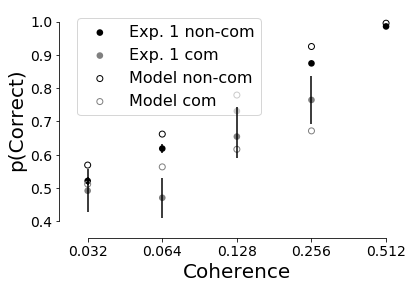

In [561]:
plot_(choices_1,'exp1')

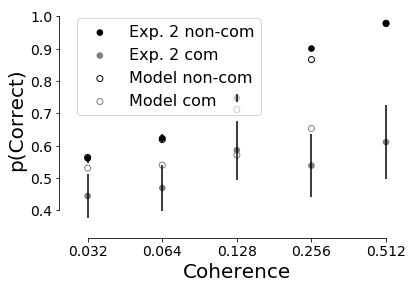

In [478]:
plot_(choices_2,'exp2')

## Function below is adapted from the data analysis scripts. Calculates confidence intervals for probabilities of changes-of-mind. 

In [251]:
def get_ci_p_com(c, correct_col='is_correct', n_threshold=10):
    p_com = np.array([len(c[(c.is_com) & (c.coherence==coherence) & (c[correct_col]==is_correct)]) / 
                   len(c[(c.coherence==coherence)]) 
               if (len(c[(c.is_com) & (c.coherence==coherence) & (c[correct_col]==is_correct)])>n_threshold) else np.NaN  
           for coherence in np.sort(c.coherence.unique()) 
           for is_correct in np.sort(c[correct_col].unique())])
    n = [len(c[(c.coherence==coherence) & (c[correct_col]==is_correct)]) 
                      for coherence in np.sort(c.coherence.unique()) 
                      for is_correct in np.sort(c[correct_col].unique())]

    ci = pd.DataFrame(p_com, columns=['p_com'], 
                        index=pd.MultiIndex.from_product([np.sort(c.coherence.unique()), 
                                                          np.sort(c[correct_col].unique())], 
                                                         names=['coherence', correct_col]))
    ci['ci_l'] = ci['p_com'] - np.sqrt(p_com*(1-p_com)/n)
    ci['ci_r'] = ci['p_com'] + np.sqrt(p_com*(1-p_com)/n)
    
    return ci.reset_index()

def get_ci_p_com_total(c, n_threshold=10):
    p_com_total = [(len(c[(c.is_com) & (c.coherence==coherence)]) / len(c[(c.coherence==coherence)]), coherence)
               if (len(c[(c.is_com) & (c.coherence==coherence)]) > n_threshold) else (np.NaN, coherence)
           for coherence in np.sort(c.coherence.unique())]
    
    n = [len(c[(c.coherence==coherence)]) for coherence in np.sort(c.coherence.unique())]
    
    ci = pd.DataFrame(p_com_total, columns=['p_com', 'coherence'])  
    
    p_com = ci.p_com
    ci['ci_l'] = ci['p_com'] - np.sqrt(p_com*(1-p_com)/n)
    ci['ci_r'] = ci['p_com'] + np.sqrt(p_com*(1-p_com)/n)
    
    return ci.reset_index()

## Then, we plot a figure that shows the model vs. experimental data p(CoM). We use that for experiment 1 and 2. 

In [562]:
def plot_figure_3(c,exp):
    n_threshold = 10
    correct_col='is_correct'
    #Experimental data: 
    plt.figure()
    save_path = '../../figures_output/'
    p_com_total = [(len(c[(c.is_com) & (c.coherence==coherence)]) / len(c[(c.coherence==coherence)]), coherence)
                   if (len(c[(c.is_com) & (c.coherence==coherence)]) > n_threshold) else (np.NaN, coherence)
                   for coherence in np.sort(c.coherence.unique())]
    
    p_com_total = pd.DataFrame(p_com_total, columns=['p_com', 'coherence'])
    
    ax = sns.pointplot(data=p_com_total, x='coherence', y='p_com', scale=0.75, color='black', join=False)
    
    p_com = [len(c[(c.is_com) & (c.coherence==coherence) & (c[correct_col]==is_correct)]) / 
                   len(c[(c.coherence==coherence)]) 
             if (len(c[(c.is_com) & (c.coherence==coherence) & (c[correct_col]==is_correct)]) > n_threshold) else np.NaN  
             for coherence in np.sort(c.coherence.unique()) 
             for is_correct in np.sort(c[correct_col].unique())]
    
    p_com = pd.DataFrame(p_com, columns=['p_com'], 
                        index=pd.MultiIndex.from_product([np.sort(c.coherence.unique()), 
                                                          np.sort(c.is_correct.unique())], 
                                                         names=['coherence', correct_col]))
    p_com.loc[0] = np.NaN
    ax = sns.pointplot(data=p_com.reset_index(), x='coherence', y='p_com', hue=correct_col,
                       palette=['red', 'green'], linestyles='None', scale=0.75, ax=ax, join = False)
    

    
    ci_total = get_ci_p_com_total(c, n_threshold=n_threshold)
    ax.vlines(x=range(0,6), ymin=ci_total.ci_l, ymax=ci_total.ci_r, color='gray', zorder=20)
    
    ci = get_ci_p_com(c, correct_col, n_threshold=n_threshold)
    ax.vlines(x=[val for pair in zip(range(1,6), range(1,6)) for val in pair], 
              ymin=ci[ci.coherence>0].ci_l, ymax=ci[ci.coherence>0].ci_r, color='k', zorder=10)

    ax.set_ylim(-0.005, 0.06)
    
    red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='')
    green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='')
    black_circle = mlines.Line2D([], [], color='black', marker='o', linestyle='')
    
    
    fig3ab = pd.read_csv('../../figures_output/Fig3_ab_exp1.txt', sep=',')
    if(exp == 'Exp. 2'):
        fig3ab = pd.read_csv('../../figures_output/Fig3_ab_exp2.txt', sep=',')
    
    fig3ab['p_com_correct'][0] = np.NaN
    fig3ab['pcom_incorrect'][0] = np.NaN
    
    
    ax.scatter([0,1,2,3,4,5], fig3ab.p_com_all, marker = 'o', color='black', label='Total', facecolors='none')
    ax.scatter([0,1,2,3,4,5],fig3ab.p_com_correct, marker = 'o', color='green', label='Correct', facecolors='none')
    ax.scatter([0,1,2,3,4,5],fig3ab.pcom_incorrect, marker = 'o',color='red', label='Error', facecolors='none')
    plt.legend(handles= [black_circle, green_circle, red_circle] ,labels=['Total', 'Correct', 'Error'], frameon=True)
    
    plt.title(exp)
        
    plt.xlabel('Coherence')
    plt.ylabel('p(CoM)')
    plt.xticks(np.arange(6), ('0', '0.032', '0.064', '0.128', '0.256', '0.512'))
    
    save_path = save_path + 'pcom' + '_' + exp.lower().replace(" ", "_") + '.png'
    plt.savefig(save_path, bbox_inches='tight')

## Modelquantitatively fits the probability of changes of mind for experiment 1. Decaying overall probability of changes of mind vs. motion coherence, criss-crossing error/correct probabilities


## Summary of changes in parameters from Exp1 --> Exp2:
- Gain modulation 1.12 --> 1.16 (more urgent responses)
- Excitatory feedback from unecrtainty: 0.02 --> 0.05 (increasing probability of changes-of-mind despite quicker responses)


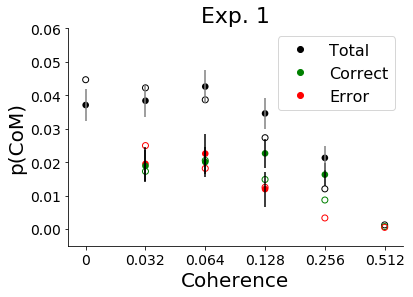

In [563]:
plot_figure_3(choices_1, 'Exp. 1')

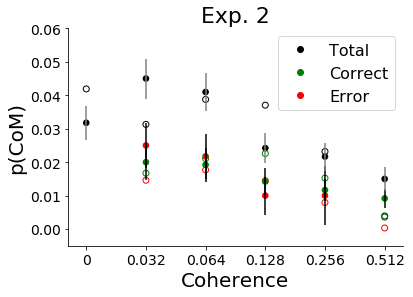

In [564]:
plot_figure_3(choices_2, 'Exp. 2')

## Hand initiation time plotting. We use this function once for plotting the hand initiation times for exp1 and then for exp2. 

In [705]:
import matplotlib.lines as mlines


def plot_var_exp_model(choices, exp, var, is_com, estimator=np.mean):
    plt.figure()
    save_path = '../../figures_output/'
    file_string = 'non_com'
    ax = sns.pointplot(data=choices[(choices.coherence > 0) & (~choices.is_correct) & (choices.coherence != 0.512) & (choices.is_com == is_com)],
                       x='coherence', y=var, linestyles=['--'], color='red',
                       markers=['o'], scale=1.0, errwidth=0.5, estimator=estimator,join=False)

    sns.pointplot(data=choices[(choices.coherence > 0) & (choices.is_correct) & (choices.is_com == is_com)],
                       x='coherence', y=var, linestyles=['--'], color='green',
                       scale=1.0, errwidth=0.5, estimator=estimator, ax=ax, join=False)
    
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
   


    correct_line = mlines.Line2D([], [], color='green', marker='o', ls='',label='Exp. correct')
    error_line = mlines.Line2D([], [], color='red', marker='o', ls='',label='Exp. error')
    correct_line_model = mlines.Line2D([], [], color='green', marker='o', ls='', mfc='none', label='Model correct')
    error_line_model = mlines.Line2D([], [], color='red', marker='o', ls='', mfc='none',label='Model error')
    
    if(exp == 'Exp. 1'):
        fig2c = pd.read_csv('../../figures_output/Fig2_c_exp1.txt', sep=',')
        fig2c.init_z_error[5] = np.nan
        if(is_com):
            file_string = 'com'
            fig2c = pd.read_csv('../../figures_output/Fig2_c2_exp1.txt', sep=',')
        if(var == 'mouse_IT_z'):
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_correct[1::], yerr=fig2c.init_z_correct_sem[1::],fmt='o',color='green', mfc='none', label='Correct')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_error[1::], yerr=fig2c.init_z_error_sem[1::],fmt='o', color='red', mfc='none', label='Error')
        if(var == 'eye_IT_z'):
            fig2c = pd.read_csv('../../figures_output/Fig2_d_exp1.txt', sep=',')
            fig2c.eye_init_z_error[5] = np.nan
            if(is_com):   
                fig2c = pd.read_csv('../../figures_output/Fig2_d2_exp1.txt', sep=',')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.eye_init_z_correct[1::], yerr=fig2c.eye_init_z_correct_sem[1::],fmt='o',color='green', mfc='none', label='Model correct')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.eye_init_z_error[1::], yerr=fig2c.eye_init_z_error_sem[1::],fmt='o', color='red', mfc='none', label='Model error')
    
    if(exp == 'Exp. 2'):
        fig2c = pd.read_csv('../../figures_output/Fig2_c_exp2.txt', sep=',')
        fig2c.init_z_error[5] = np.nan
        if(is_com):
            file_string = 'com'
            fig2c = pd.read_csv('../../figures_output/Fig2_c2_exp2.txt', sep=',')
        if(var == 'mouse_IT_z'):
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_correct[1::], yerr=fig2c.init_z_correct_sem[1::],fmt='o',color='green', mfc='none', label='Model correct')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_error[1::], yerr=fig2c.init_z_error_sem[1::],fmt='o', color='red', mfc='none', label='Model error')
        if(var == 'eye_IT_z'):
            fig2c = pd.read_csv('../../figures_output/Fig2_d_exp2.txt', sep=',')
            fig2c.eye_init_z_error[5] = np.nan
            if(is_com):
                fig2c = pd.read_csv('../../figures_output/Fig2_d2_exp2.txt', sep=',')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.eye_init_z_correct[1::], yerr=fig2c.eye_init_z_correct_sem[1::],fmt='o',color='green', mfc='none', label='Model correct')
            ax.errorbar(x=[0,1,2,3,4], y=fig2c.eye_init_z_error[1::], yerr=fig2c.eye_init_z_error_sem[1::],fmt='o', color='red', mfc='none', label='Model error')
    
    
    plt.legend(handles=[correct_line_model, error_line_model, correct_line, error_line], frameon=True)
    ax.set(ylim=(-2.0, 2.0))
    ax.set_ylabel('eye IT (z)')
    plt.title(exp)
    if(var== 'mouse_IT_z'):
        ax.set_ylabel('hand IT (z)')
    plt.tight_layout()
    
    save_path = save_path + var + '_' + file_string + '_' + exp.lower().replace(" ", "_") + '.png'
    plt.savefig(save_path, bbox_inches='tight')

## Model fit for initiation times from exp 1 and 2
### Main difference between initiation times for experiment 1 and experiment 2 is: Faster hand initiation times in experiment 2 due to new instructions to urge participants to respond as soon as possible.

#### Experiment 1 non com Hand IT

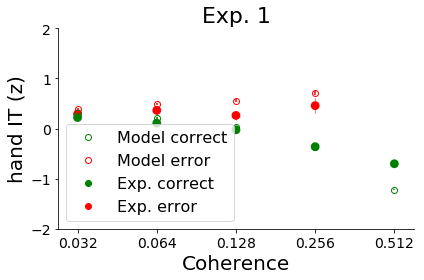

In [706]:
plot_var_exp_model(choices_1, 'Exp. 1', 'mouse_IT_z', False)

#### Experiment 1  com Hand IT

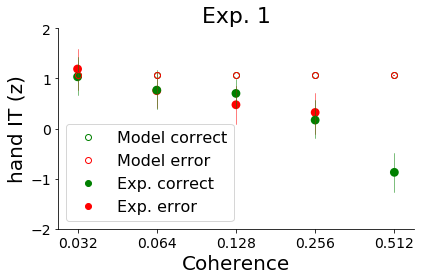

In [707]:
plot_var_exp_model(choices_1, 'Exp. 1', 'mouse_IT_z', True)

#### Experiment 2 non com Hand IT

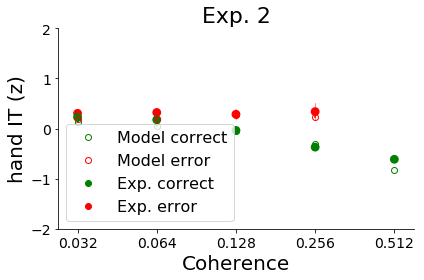

In [708]:
plot_var_exp_model(choices_2, 'Exp. 2', 'mouse_IT_z', False)

#### Experiment 2  com Hand IT

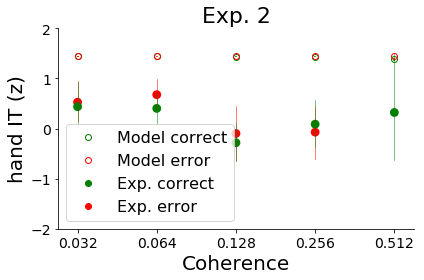

In [709]:
plot_var_exp_model(choices_2, 'Exp. 2', 'mouse_IT_z', True)

#### Experiment 1  non com eye IT

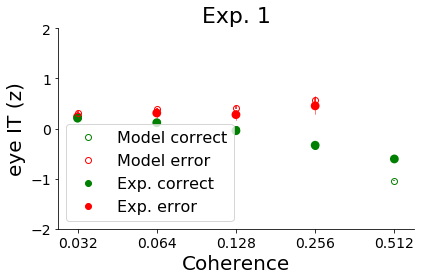

In [710]:
plot_var_exp_model(choices_1, 'Exp. 1', 'eye_IT_z', False)

#### Experiment 1 com eye IT

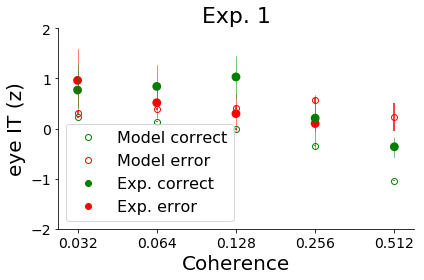

In [711]:
plot_var_exp_model(choices_1, 'Exp. 1', 'eye_IT_z', True)

#### Experiment 2  non com eye IT

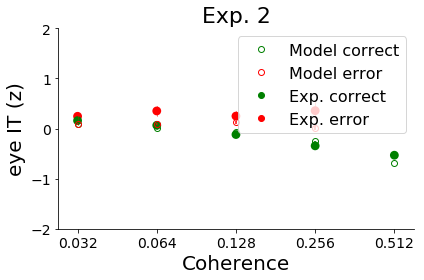

In [712]:
plot_var_exp_model(choices_2, 'Exp. 2', 'eye_IT_z', False)

#### Experiment 2  com eye IT

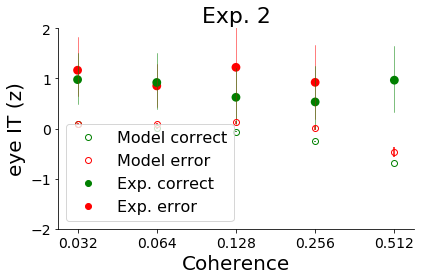

In [713]:
plot_var_exp_model(choices_2, 'Exp. 2', 'eye_IT_z', True)

# Tertiles plot function

In [18]:
def get_p_com_per_var(c, var):
    return np.array([(len(c[(c.is_com) & (c.coherence==coherence) & (c[var]==var_level)]) / 
                   len(c[(c.coherence==coherence)])) 
               if len(c[(c.coherence==coherence) & (c[var]==var_level)]) else np.NaN  
           for coherence in np.sort(c.coherence.unique())
           for var_level in np.sort(c[var].unique())])
    
def get_ci_vs_var(choices, var, n_threshold=0):
 # use this line when probability is to be calculated conditional on the IT tertile level
#     p_com = (choices.groupby(by=['coherence', var])
#              .apply(lambda c: len(c[c.is_com])/len(c) if len(c) else np.NaN)
#              .rename('p_com'))
#     # use this one when probability is to be calculated within coherence level across all IT tertiles
    p_com = get_p_com_per_var(choices, var)    

    n = choices.groupby(by=['coherence', var]).apply(len)
    ci = pd.DataFrame(p_com, columns=['p_com'], 
                        index=pd.MultiIndex.from_product([np.sort(choices.coherence.unique()), 
                                                          np.sort(choices[var].unique())], 
                                                         names=['coherence', var]))
    ci['ci_l'] = ci['p_com'] - np.sqrt(p_com*(1-p_com)/n)
    ci['ci_r'] = ci['p_com'] + np.sqrt(p_com*(1-p_com)/n)

    return ci.reset_index()
    
def plot_p_com_vs_var_ci(choices, var, title, palette='viridis_r', n_threshold=0):
    plt.figure()
    # this is needed to convert eye IT tertile from float to int
    choices[var] = choices[var].astype(int)
    ci = get_ci_vs_var(choices, var, n_threshold=n_threshold)

    ax = sns.pointplot(data=ci, x='coherence', y='p_com', hue=var, palette=palette)
    ax.vlines(x=[val for pair in zip(range(0,6), range(0,6), range(0,6)) for val in pair], 
              ymin=ci.ci_l, ymax=ci.ci_r, color='gray', zorder=0)


#     ax.set_ylim(-0.005, 0.12)
    ax.set_ylabel('p(CoM)')
    sns.despine(ax=ax, trim=True, offset=5)
    plt.title(title)
    

    return ax

### The following confirms that in the model, CoM are more likely when initiation time is slowest and in lower coherence levels.

In [22]:
model_tertiles = pd.read_csv('../../figures_output/Fig6_exp1.txt', sep=',')
model_tertiles = model_tertiles[(model_tertiles.coherence == 51.2) & (model_tertiles.is_com == True)]

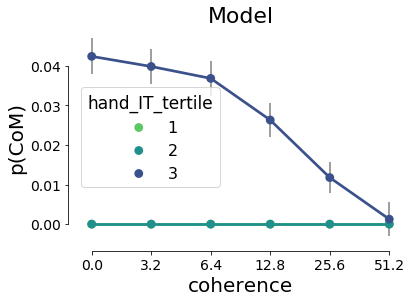

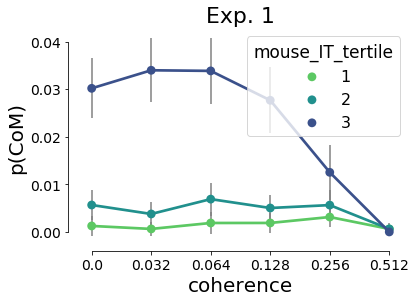

In [24]:
model_tertiles = pd.read_csv('../../figures_output/Fig6_exp1.txt', sep=',')
model_tertiles['hand_IT_tertile'] = pd.qcut(model_tertiles['hand_IT'], 3, labels=[1, 2, 3])

model_tertiles['is_com'] = model_tertiles['is_com'].astype('bool')

plot_p_com_vs_var_ci(model_tertiles, 'hand_IT_tertile', 'Model', n_threshold=10)
plot_p_com_vs_var_ci(choices_1, 'mouse_IT_tertile', 'Exp. 1', n_threshold=10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


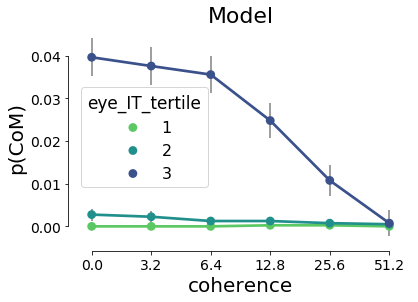

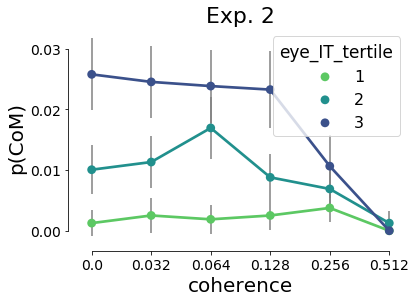

In [25]:
model_tertiles = pd.read_csv('../../figures_output/Fig6b_exp1.txt', sep=',')
model_tertiles['eye_IT_tertile'] = pd.qcut(model_tertiles['eye_IT'], 3, labels=[1, 2, 3])

model_tertiles['is_com'] = model_tertiles['is_com'].astype('bool')


plot_p_com_vs_var_ci(model_tertiles, 'eye_IT_tertile','Model', n_threshold=10)
plot_p_com_vs_var_ci(choices_1[~choices_1['eye_IT_tertile'].isnull()], 'eye_IT_tertile', 'Exp. 2', n_threshold=10)

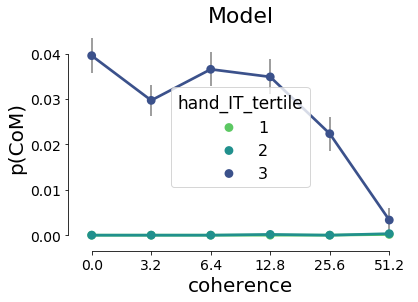

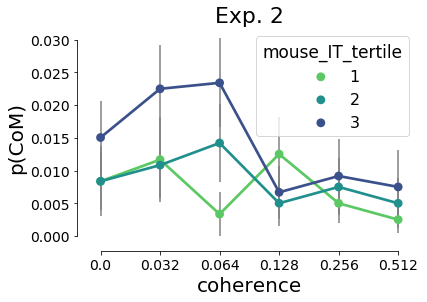

In [26]:
model_tertiles = pd.read_csv('../../figures_output/Fig6_exp2.txt', sep=',')
model_tertiles['hand_IT_tertile'] = pd.qcut(model_tertiles['hand_IT'], 3, labels=[1, 2, 3])

model_tertiles['is_com'] = model_tertiles['is_com'].astype('bool')

plot_p_com_vs_var_ci(model_tertiles, 'hand_IT_tertile', 'Model', n_threshold=10)
plot_p_com_vs_var_ci(choices_2, 'mouse_IT_tertile', 'Exp. 2', n_threshold=10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


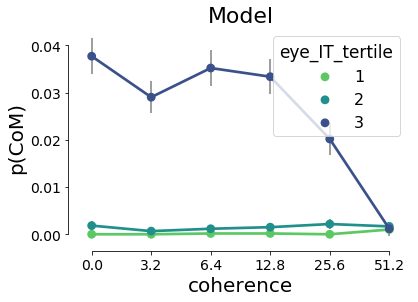

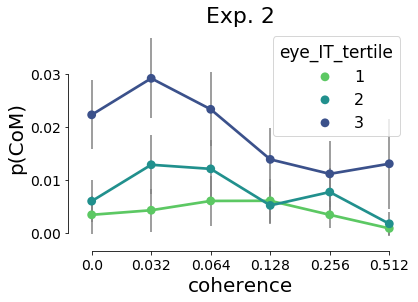

In [27]:
model_tertiles = pd.read_csv('../../figures_output/Fig6b_exp2.txt', sep=',')
model_tertiles[~model_tertiles.isin([np.nan, np.inf, -np.inf]).any(1)]

model_tertiles['eye_IT_tertile'] = pd.qcut(model_tertiles['eye_IT'], 3, labels=[1, 2, 3])

model_tertiles['is_com'] = fig6['is_com'].astype('bool')


plot_p_com_vs_var_ci(model_tertiles, 'eye_IT_tertile','Model', n_threshold=10)
plot_p_com_vs_var_ci(choices_2[~choices_2['eye_IT_tertile'].isnull()], 'eye_IT_tertile', 'Exp. 2', n_threshold=10)

# Trajectories

In [685]:
def post_process_trajectory(traj, n_steps, traj_type):

    traj.timestamp = (traj.timestamp - traj.timestamp.min())/1000.0
    # Make the sampling time intervals regular
    n = np.arange(0, n_steps + 1)
    t_regular = np.linspace(traj.timestamp.min(), traj.timestamp.max(), n_steps + 1)
    if(traj_type == 'mouse'):
        mouse_x_interp = np.interp(t_regular, traj.timestamp.values, traj.mouse_x.values)
        traj_interp = pd.DataFrame([n, t_regular, mouse_x_interp]).transpose()
        traj_interp.columns = ['n', 'timestamp', 'mouse_x']
    if(traj_type == 'eye'):
        eye_x_interp = np.interp(t_regular, traj.timestamp.values, traj.eye_x.values)
        traj_interp = pd.DataFrame([n, t_regular, eye_x_interp]).transpose()
        traj_interp.columns = ['n', 'timestamp', 'eye_x']
    
    return traj_interp


In [697]:
#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format
# color palette for sequential data
palette_sqn = 'viridis_r'
# color palette for participant IDs
palette_subj = 'magma_r'

def get_screen_params():
    return {'x_lim':[-960-10, 960+10],
            'y_lim':[0-10, 1080+10],
            'left_resp_area_center':[-(960-150), (1080-170)],
            'right_resp_area_center':[(960-150), (1080-170)],
            'resp_area_radius':90}

def plot_traj_x(ax, trajectory, traj_type, title):
    p = get_screen_params()
    left_resp_area = plt.Circle(p['left_resp_area_center'], p['resp_area_radius'], 
                                alpha=0.3, facecolor='red', edgecolor='white')
    right_resp_area = plt.Circle(p['right_resp_area_center'], p['resp_area_radius'], 
                                 alpha=0.3, facecolor='green', edgecolor='white')
    ax.add_artist(left_resp_area)
    ax.add_artist(right_resp_area)
    step=2
    if(traj_type == 'mouse'):
        ax.plot(np.array(trajectory.mouse_x), marker='o', markersize=7, alpha=0.6, label='Hand', color='grey')
    if(traj_type == 'eye'):
        ax.plot(np.array(trajectory.eye_x), marker='o', markersize=7, alpha=0.6, label='Hand', color='grey')
        
    ax.set_title(title)
    ax.set_xlabel('time (a.u.)')
    ax.set_ylabel('x position')
    
    
def plot_example_traj_x(dynamics, traj_type):
    fig, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1,ncols=2, sharex=True, sharey=True, squeeze=True)
    
    save_fig = '../../figures_output/'

    trajectory = dynamics.loc[(624, 3, 10, 35)]
    
    plot_traj_x(ax2, trajectory, traj_type, 'CoM Experiment')
    
    fig4 = pd.read_csv('../../figures_output/Fig4_exp2.txt', sep=',')
    if(traj_type == 'eye'):
        fig4 = pd.read_csv('../../figures_output/Fig4b_exp2.txt', sep=',')
        
    fig4_resampled = post_process_trajectory(traj=fig4, n_steps=200, traj_type= traj_type)
    
    plot_traj_x(ax1, fig4_resampled * -1, traj_type, 'CoM Model')
    save_fig = save_fig + 'traj_x' + traj_type + '.png'
    plt.savefig(save_fig, bbox_inches='tight')





## Hand trajectory

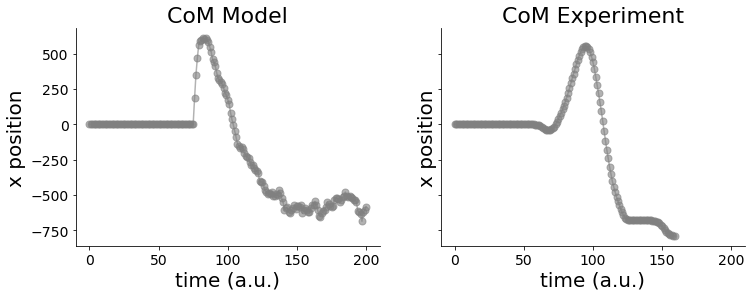

In [698]:
plot_example_traj_x(dynamics_2, 'mouse')

## Eye trajectory

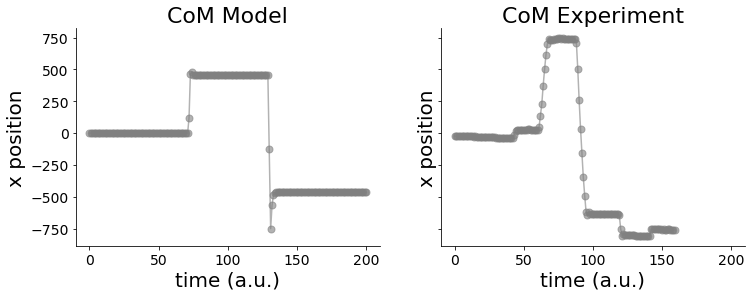

In [699]:
plot_example_traj_x(dynamics_2, 'eye')